In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('sched.csv')

In [79]:
team_names = list(df['Visitor/Neutral'].unique())
current_elos = {}
elo_histories = {}
for name in team_names:
    current_elos[name] = 1500
    elo_histories[name] = [1500]

In [80]:
def expected_score(rating_a, rating_b):
    return 1 / (1 + 10 ** ((rating_b - rating_a) / 400))

def update_elo(rating, expected, actual, k=20):
    """
    Update the Elo rating based on game result.
    :param rating: Current Elo rating
    :param expected: Expected score
    :param actual: Actual score (1 for win, 0 for loss)
    :param k: K-factor
    :return: Updated Elo rating
    """
    return rating + k * (actual - expected)

In [81]:
for index, row in df.iterrows():
    print('g')
    away = row['Visitor/Neutral']
    away_score = row['PTS']
    home = row['Home/Neutral']
    home_score = row['PTS.1']

    home_elo = current_elos[home]
    away_elo = current_elos[away]

    if home_score > away_score:
        result = 1
    else:
        result = 0
    
    expected_home_score = expected_score(current_elos[home], current_elos[away])
    expected_away_score = expected_score(current_elos[away], current_elos[home])
    new_rating_home = update_elo(home_elo, expected_home_score, result)
    new_rating_away = update_elo(away_elo, expected_away_score, 1 - result)

    elo_histories[home].append(new_rating_home)
    elo_histories[away].append(new_rating_away)

    current_elos[home] = new_rating_home
    current_elos[away] = new_rating_away

g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g


In [82]:
current_elos

{'Los Angeles Lakers': 1585.5065490458464,
 'Phoenix Suns': 1599.283462150405,
 'Houston Rockets': 1513.3489137019405,
 'Boston Celtics': 1680.1242737657349,
 'Washington Wizards': 1287.844096630807,
 'Atlanta Hawks': 1455.4805417053362,
 'Detroit Pistons': 1292.716208328261,
 'Minnesota Timberwolves': 1607.585468454011,
 'Cleveland Cavaliers': 1518.285748264859,
 'New Orleans Pelicans': 1573.5704513063288,
 'Oklahoma City Thunder': 1633.2897749615029,
 'Sacramento Kings': 1528.4697536741792,
 'Dallas Mavericks': 1600.6172445327352,
 'Portland Trail Blazers': 1328.7351144370923,
 'Philadelphia 76ers': 1535.5989237672438,
 'Denver Nuggets': 1635.1703866758444,
 'New York Knicks': 1584.6470741129256,
 'Miami Heat': 1538.0262281931318,
 'Toronto Raptors': 1327.6835892153847,
 'Brooklyn Nets': 1410.835258958843,
 'Los Angeles Clippers': 1563.1514632066508,
 'Orlando Magic': 1530.1200225725372,
 'Golden State Warriors': 1575.333207563422,
 'Chicago Bulls': 1488.3390243996128,
 'Memphis Griz

In [85]:
sorted(current_elos.items(), key=lambda item: item[1], reverse=True)

[('Boston Celtics', 1680.1242737657349),
 ('Denver Nuggets', 1635.1703866758444),
 ('Oklahoma City Thunder', 1633.2897749615029),
 ('Minnesota Timberwolves', 1607.585468454011),
 ('Dallas Mavericks', 1600.6172445327352),
 ('Phoenix Suns', 1599.283462150405),
 ('Los Angeles Lakers', 1585.5065490458464),
 ('New York Knicks', 1584.6470741129256),
 ('Golden State Warriors', 1575.333207563422),
 ('New Orleans Pelicans', 1573.5704513063288),
 ('Los Angeles Clippers', 1563.1514632066508),
 ('Indiana Pacers', 1559.706752140062),
 ('Miami Heat', 1538.0262281931318),
 ('Philadelphia 76ers', 1535.5989237672438),
 ('Orlando Magic', 1530.1200225725372),
 ('Milwaukee Bucks', 1529.390749285605),
 ('Sacramento Kings', 1528.4697536741792),
 ('Cleveland Cavaliers', 1518.285748264859),
 ('Houston Rockets', 1513.3489137019405),
 ('Chicago Bulls', 1488.3390243996128),
 ('Atlanta Hawks', 1455.4805417053362),
 ('Brooklyn Nets', 1410.835258958843),
 ('San Antonio Spurs', 1398.1550992671487),
 ('Utah Jazz', 13

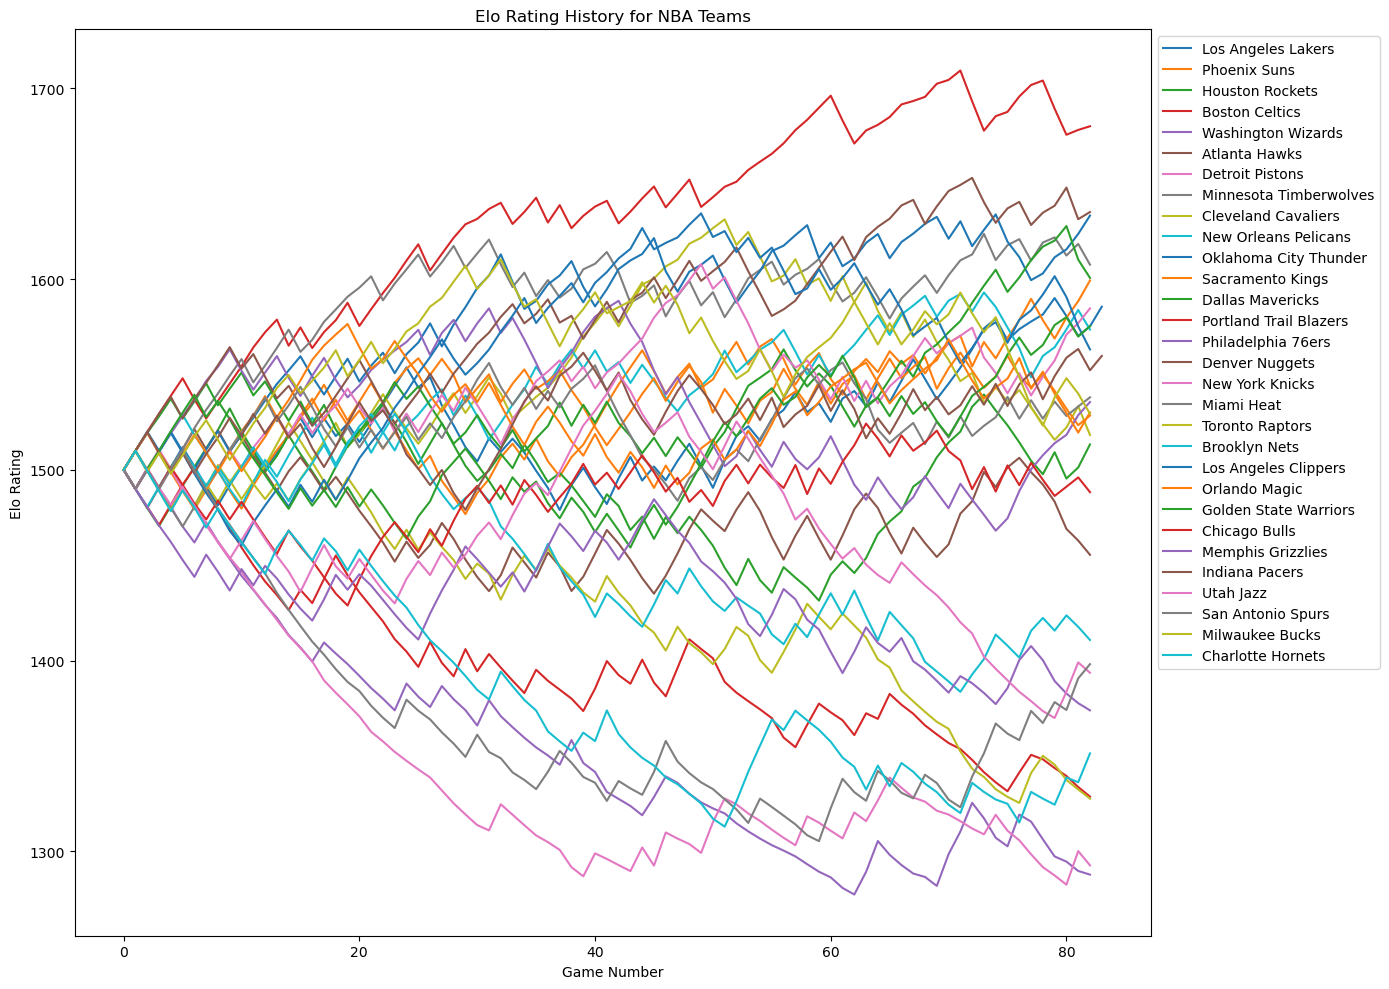

In [84]:
import matplotlib.pyplot as plt

# Create a new figure with a specified size
plt.figure(figsize=(14, 10))

# Plot each team's Elo history
for team, elos in elo_histories.items():
    plt.plot(elos, label=team)

# Add labels and title
plt.xlabel('Game Number')
plt.ylabel('Elo Rating')
plt.title('Elo Rating History for NBA Teams')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)  # Legend outside the plot

# Improve layout and display the plot
plt.tight_layout()
plt.show()